# Vamos a performance de uma carteira de ativos.

- Análisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### DATA FRAME DE COTAÇÕES DO ATIVOS DA CARTEIRA

In [47]:
carteira_x = pd.DataFrame()

for ativo in carteira['Ativos']:
    carteira_x[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']
    
display(carteira_x)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,32.214539,35.841541,10.9650,19.055841,18.437340,70.915001,38.330002,126.190002,149.000000,199.600006,NaN
2020-01-03,113.800003,140.899994,11.922435,32.229355,35.464542,11.0675,19.561922,18.490847,72.241058,41.000000,127.699997,147.000000,199.600006,NaN
2020-01-06,112.589996,139.100006,11.932190,31.653679,34.936787,11.3500,19.634151,18.464096,69.262352,40.130001,126.699997,148.559998,197.979996,NaN
2020-01-07,112.239998,139.399994,11.898047,31.103777,34.126278,11.2650,19.594961,18.537760,66.897202,40.779999,126.870003,143.830002,198.750000,NaN
2020-01-08,111.949997,138.199997,12.263843,30.622623,33.570217,11.2125,19.692934,18.373470,67.293045,40.990002,124.570000,139.470001,187.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,17.952335,24.097120,14.4000,18.164528,18.547529,71.288712,47.669998,107.500000,126.970001,158.380005,127.660004
2020-11-05,96.949997,115.900002,27.401571,18.230131,24.665810,14.6775,19.222658,19.367037,72.212227,50.279999,107.500000,128.380005,158.179993,127.959999
2020-11-06,97.190002,117.510002,27.281780,18.186728,24.636890,14.7925,19.820301,19.579319,73.344261,50.630001,107.349998,128.029999,158.440002,130.000000


### Será que todos os ativos vieram corretos?

In [48]:
carteira_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   214 non-null    float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  110 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


### Ajustando os dados

In [49]:
df_media = carteira_x.mean()
carteira_x.fillna(df_media)
carteira_x.info()

#Preencher com o último valor
#carteira_x = carteira_x.ffill()
#carteira_x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-10
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   GNDI3   214 non-null    float64
 9   NTCO3   214 non-null    float64
 10  BCRI11  214 non-null    float64
 11  VILG11  214 non-null    float64
 12  KNRI11  214 non-null    float64
 13  XPLG11  110 non-null    float64
dtypes: float64(14)
memory usage: 25.1 KB


### Vamos ver como que as ações foram individualmente

<AxesSubplot:xlabel='Date'>

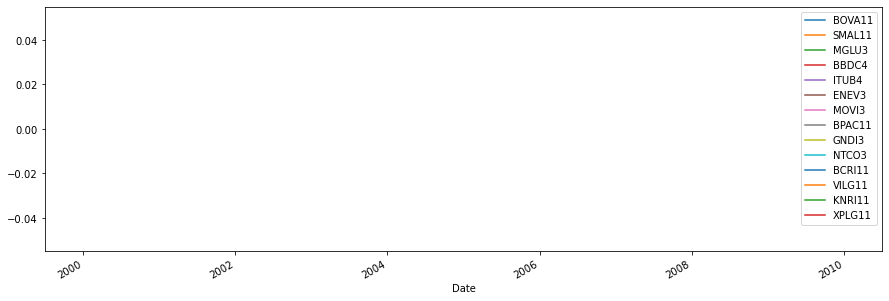

In [67]:
carteira_x2 = carteira_x / carteira_x.iloc[0]
carteira_x2.plot(figsize=(15,5))

### Vamos puxar o IBOV para comparar

### Criando um DATAFRAME da carteira com as quantiades de ações